In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import hashlib
import numpy as np
#import mplcursors
import mpldatacursor
import plotly.express as px

In [4]:
df  = pd.read_csv("../data/prepared/prepared_2023-09-02.csv", index_col=0)
df.head()

,Uhrzeit,Datum,Region,Strasse,Ort_PLZ,Tankstelle,Preis,PLZ,Ort,Zeit,Stunde,Minute,Sekunde,Wochentag,ID
0,2023-07-02 19:25:32,2023-07-02,76135+Karlsruhe%2FBeiertheim,Eichelbergstr. 34,76189 Karlsruhe,Supermarkt Tankstelle,1.699,76189,Karlsruhe,19:25:32,19,25,32,7,15
1,2023-07-02 19:25:32,2023-07-02,76135+Karlsruhe%2FBeiertheim,Hardeckstr. 16,76185 Karlsruhe,"Eberhardt, Hardeckstraße, Karlsruhe",1.709,76185,Karlsruhe,19:25:32,19,25,32,7,22
2,2023-07-02 19:25:32,2023-07-02,76135+Karlsruhe%2FBeiertheim,Lameystr. 7,76185 Karlsruhe,bft,1.719,76185,Karlsruhe,19:25:32,19,25,32,7,31
3,2023-07-02 19:25:32,2023-07-02,76135+Karlsruhe%2FBeiertheim,Fettweisstr. 8,76189 Karlsruhe,bft,1.719,76189,Karlsruhe,19:25:32,19,25,32,7,18
4,2023-07-02 19:25:32,2023-07-02,76135+Karlsruhe%2FBeiertheim,Waldhorn Str. 14-16,76137 Karlsruhe,ZG Raiffeisen Energie,1.719,76137,Karlsruhe,19:25:32,19,25,32,7,48


In [10]:
df_g_Wochentag = df.groupby(by=["Wochentag","Stunde"],as_index=False)['Preis'].mean().sort_values(by=['Preis'],ascending=True)
df_g_Wochentag

,Wochentag,Stunde,Preis
87,7,19,1.741800
37,3,23,1.754161
47,4,16,1.755901
35,3,20,1.758085
34,3,18,1.758543
...,...,...,...
43,4,8,1.819469
17,2,8,1.821925
68,6,8,1.822286
55,5,8,1.822850


In [17]:
df_1 = df.groupby(by=["Uhrzeit"])['Preis'].mean().sort_index(ascending=True).reset_index()
df_1.head()

,Uhrzeit,Preis
0,2023-07-03 01:40:19,1.734000
1,2023-07-03 02:56:56,1.734000
2,2023-07-03 04:19:31,1.730667
3,2023-07-03 06:21:10,1.732333
4,2023-07-03 08:20:19,1.737333


In [18]:
#Trendlinie berechen
x = np.arange(len(df_1))
y = df_1['Preis'].values
trend = np.polyfit(x, y, deg=1)  # Grad 1 für lineare Trendlinie

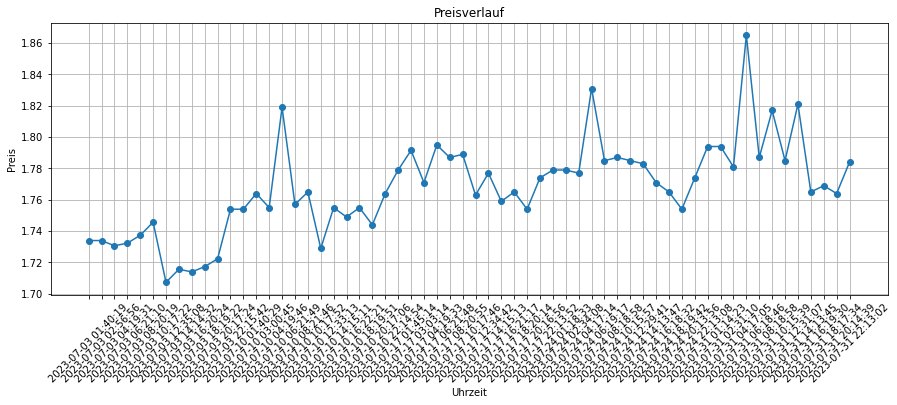

In [19]:
#Size of the plot
plt.rcParams['figure.figsize'] = [15, 5]
# Plot
fig, ax = plt.subplots()
line, = ax.plot(df_1['Uhrzeit'], df_1['Preis'], marker='o', linestyle='-')
ax.set_xlabel('Uhrzeit')
ax.set_ylabel('Preis')
ax.set_title('Preisverlauf')
ax.grid(True)  # Gitterlinien hinzufügen

plt.xticks(rotation=45)
plt.show()

In [14]:
# Mit hoverover funktion
fig = px.line(df_1, x='Uhrzeit', y='Preis', hover_data=['Preis'], markers=True)

fig.update_layout(
    title='Preisverlauf',
    xaxis_title='Datum',
    yaxis_title='Preis'
)
fig.show()